# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털 https://kosis.kr/index/index.do
- 온라인 쇼핑몰 판매매체별 / 상품군별거래액
- 합계등을 제외하고 선택(전기전자통신 2020년전후로 분리되어서 미리 합침)
- 행렬을 전환
  <div style="display:flex">
  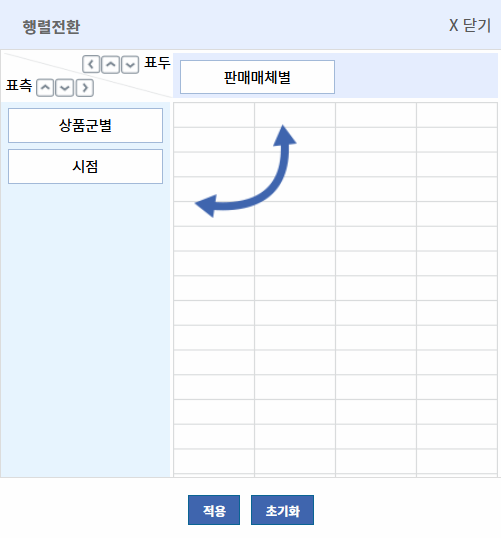
  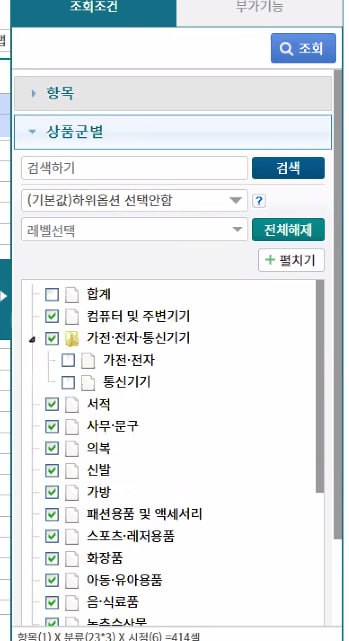
  </div>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [2]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [4]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액_20250227150411.csv"
ori = pd.read_csv(file_path, encoding = "EUC-KR") # utf-8
ori.columns = ['category','date','internet','mobile']
ori.tail()

,category,date,internet,mobile
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11 p),73246,135527
2207,기타,2024.12 p),75613,144134


In [12]:
print("수정전")
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x:x.rstrip(' p)'))
print("수정후")
print(ori['date'].tail())

수정전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [18]:
ori['date'] = pd.to_datetime(data["date"], format='%Y.%m')
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [35]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category']=='음식서비스']
obj = ['컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
1085,음·식료품,2019-06-01,336297,703854
13,컴퓨터 및 주변기기,2018-02-01,275786,177621
1558,애완용품,2018-11-01,19750,48551
1717,여행 및 교통서비스,2024-02-01,696352,1452625
1932,음식서비스,2018-01-01,37792,309665


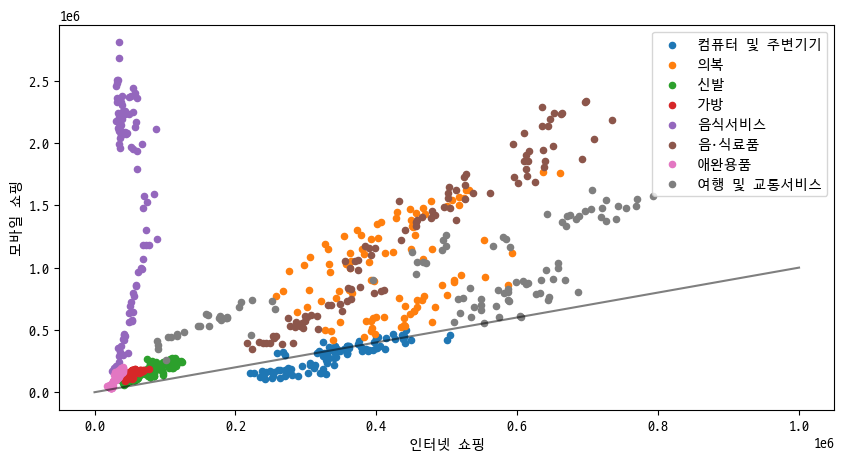

In [56]:
fig, ax = plt.subplots(figsize=(10,5))

category = obj # ['컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']

for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s = 20, label = cate)

ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.5)
plt.show()
# print(category_data,x_data,y_data)

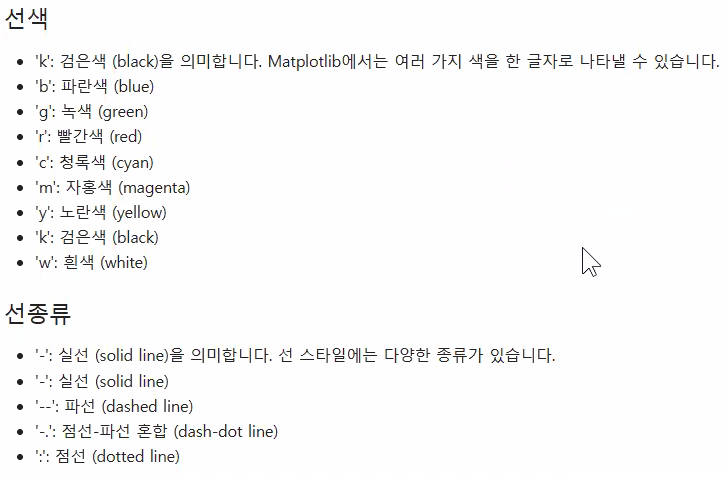